In [2]:
import tensorflow as tf
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import math as m

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


No backend selected.
Finding available backend...
Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
pi = tf.constant(m.pi)

def ode_system(t, u):
    du_t = dde.grad.jacobian(u, t)
    return du_t - tf.math.cos(2*pi*t)

In [4]:
def boundary(t, on_initial):
    return on_initial and np.isclose(t[0], 0)

In [5]:
geom = dde.geometry.TimeDomain(0, 2)

ic = dde.IC(geom, lambda t: 1, boundary)

# Reference solution to compute the error
def true_solution(t):
    return np.sin(2*np.pi*t)/(2*np.pi) + 1

data = dde.data.PDE(geom,
                    ode_system,
                    ic,
                    num_domain = 30,
                    num_boundary = 2,
                    solution = true_solution,
                    num_test = 100)

In [6]:
layer_size = [1] + [32] + [1]
activation = "tanh"
initializer = "Glorot uniform"

NN = dde.maps.FNN(layer_size, activation, initializer)

In [7]:
model = dde.Model(data, NN)
model.compile("adam", lr = 0.001)

Compiling model...
Building feed-forward neural network...
'build' took 0.039567 s


'compile' took 0.983688 s



Training model...

Step      Train loss              Test loss               Test metric
0         [3.68e+00, 1.00e+00]    [3.70e+00, 1.00e+00]    []  
1000      [4.99e-01, 3.40e-06]    [4.93e-01, 3.40e-06]    []  
2000      [4.97e-01, 1.03e-05]    [4.90e-01, 1.03e-05]    []  
3000      [4.90e-01, 1.95e-05]    [4.86e-01, 1.95e-05]    []  
4000      [4.86e-01, 4.67e-06]    [4.84e-01, 4.67e-06]    []  
5000      [4.73e-01, 2.23e-05]    [4.73e-01, 2.23e-05]    []  
6000      [4.35e-03, 8.47e-09]    [2.55e-03, 8.47e-09]    []  

Best model at step 6000:
  train loss: 4.35e-03
  test loss: 2.55e-03
  test metric: []

'train' took 4.030072 s



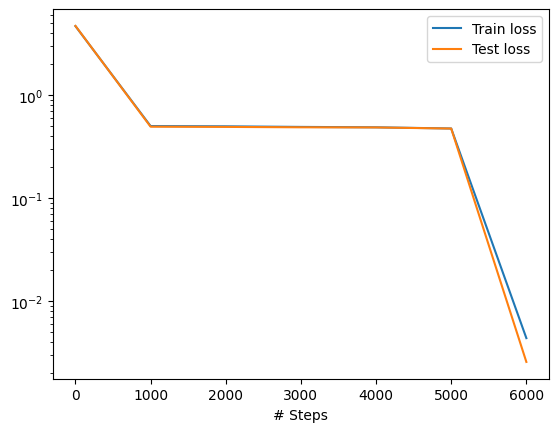

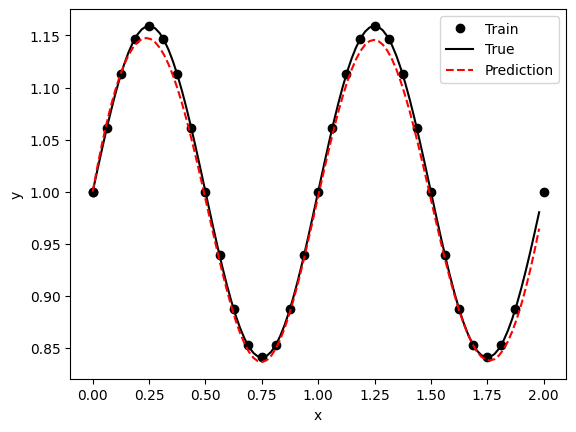

In [8]:
losshistory, train_state = model.train(epochs = 6000)
dde.saveplot(losshistory, train_state, issave = False, isplot = True)